Enter your email: t@gf.m
Enter your age: 55
Login successful!

Select art collection category:
1. Traditional Art
2. Modern Art
3. Contemporary Art
Enter your choice: 2
1. dancer.jpg
2. dye-pit.jpg
3. fish.jpg
4. honorable-man.jpg
5. iwin.png
6. masks.jpg
7. untitled.jpg
Select an image by number: 4

Select transformation to apply:
1. Translate
2. Reflect
3. Rotate
4. Crop
5. Shear X
6. Shear Y
7. Blur
Enter your choice: 7
Choose blurring method:
1. Gaussian Blur
2. Median Blur
3. Bilateral Blur
Enter your choice: 1


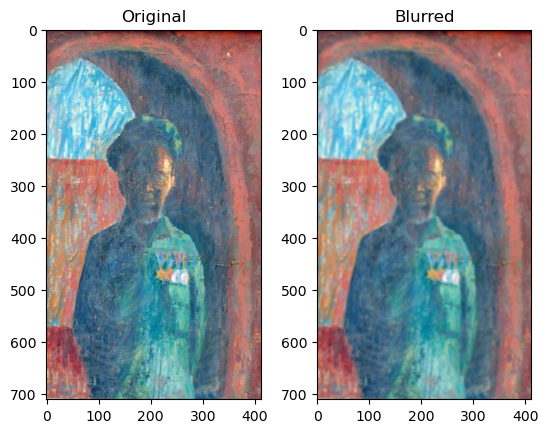

In [6]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import re

# Validate email
def validEmail(email):
    return re.match(r"[^@]+@[^@]+\.[^@]+", email) # checks valid email format using a regex pattern.

# Get user info
def vLogin():
    email = input("Enter your email: ")
    while not validEmail(email):
        print("Invalid email format.")
        email = input("Enter your email: ")
    
    age = int(input("Enter your age: "))
    while age < 18:
        print("You must be above 18 to use this service.")
        age = int(input("Enter your age: "))

    print("Login successful!\n")

# Select category folder
def select_category():
    print("Select art collection category:")
    print("1. Traditional Art")
    print("2. Modern Art")
    print("3. Contemporary Art")
    
    categories = {
        1: 'Traditional',
        2: 'Modern',
        3: 'Contemporary'
    }

    choice = int(input("Enter your choice: "))
    return categories.get(choice, 'traditional art')

# List and choose image
def imagesList(folder):
    return [f for f in os.listdir(folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

def select_image(folder):
    images = imagesList(folder)
    for i, name in enumerate(images):
        print(f"{i + 1}. {name}")
    choice = int(input("Select an image by number: ")) - 1
    return os.path.join(folder, images[choice])

# # Transformation techniques

# # 1. Translation
# def translate(img, tx, ty):
#     rows, cols = img.shape[:2]
#     M = np.float32([[1, 0, tx], [0, 1, ty]])
#     return cv2.warpAffine(img, M, (cols, rows))

# # 2. Reflection (flip)
# def reflect(img, mode):
#     return cv2.flip(img, mode)  # 1: horizontal, 0: vertical

# # 3. Rotation
# def rotate(img, angle):
#     rows, cols = img.shape[:2]
#     M = cv2.getRotationMatrix2D((cols // 2, rows // 2), angle, 1)
#     return cv2.warpAffine(img, M, (cols, rows))

# # 4. Cropping
# def crop(img, x, y, w, h):
#     return img[y:y+h, x:x+w]

# # 5. Shearing (X-axis)
# def shear_x(img, shx):
#     rows, cols = img.shape[:2]
#     M = np.float32([[1, shx, 0], [0, 1, 0]])
#     return cv2.warpAffine(img, M, (int(cols + shx * rows), rows))

# # 6. Shearing (Y-axis)
# def shear_y(img, shy):
#     rows, cols = img.shape[:2]
#     M = np.float32([[1, 0, 0], [shy, 1, 0]])
#     return cv2.warpAffine(img, M, (cols, int(rows + shy * cols)))

# # 7. Blurring
# def blur(img, k):
#     return cv2.GaussianBlur(img, (k, k), 0)

# # Display results
# def display(original, transformed, title):
#     plt.subplot(1, 2, 1)
#     plt.title("Original")
#     plt.imshow(original)
#     plt.axis("off")

#     plt.subplot(1, 2, 2)
#     plt.title(title)
#     plt.imshow(transformed)
#     plt.axis("off")
    
#     plt.show()

# # Main
# def main():
#     vLogin()
#     category_folder = select_category()
#     folder = os.path.join(os.getcwd(), category_folder)
#     image_path = select_image(folder)
#     img = cv2.imread(image_path)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # So it shows correctly in matplotlib

#     print("\nSelect transformation to apply:")
#     print("1. Translate")
#     print("2. Reflect")
#     print("3. Rotate")
#     print("4. Crop")
#     print("5. Shear X")
#     print("6. Shear Y")
#     print("7. Blur")

#     choice = int(input("Enter your choice: "))

#     if choice == 1:
#         tx = int(input("Enter translation in X (px): "))
#         ty = int(input("Enter translation in Y (px): "))
#         result = translate(img, tx, ty)
#         display(img, result, "Translated")

#     elif choice == 2:
#         print("0 = Vertical | 1 = Horizontal")
#         mode = int(input("Enter reflection mode: "))
#         result = reflect(img, mode)
#         display(img, result, "Reflected")

#     elif choice == 3:
#         angle = float(input("Enter rotation angle (degrees): "))
#         result = rotate(img, angle)
#         display(img, result, "Rotated")

#     elif choice == 4:
#         x = int(input("X start: "))
#         y = int(input("Y start: "))
#         w = int(input("Width: "))
#         h = int(input("Height: "))
#         result = crop(img, x, y, w, h)
#         display(img, result, "Cropped")

#     elif choice == 5:
#         shx = float(input("Enter shear factor for X: "))
#         result = shear_x(img, shx)
#         display(img, result, "Sheared X")

#     elif choice == 6:
#         shy = float(input("Enter shear factor for Y: "))
#         result = shear_y(img, shy)
#         display(img, result, "Sheared Y")

#     elif choice == 7:
#         k = int(input("Enter blur kernel size (odd number): "))
#         if k % 2 == 0:
#             k += 1  # Make it odd
#         result = blur(img, k)
#         display(img, result, "Blurred")

#     else:
#         print("Invalid choice!")

# if __name__ == "__main__":
#     main()

# Transformations

def translate(img, tx, ty):
    rows, cols = img.shape[:2]
    M = np.float32([[1, 0, tx], [0, 1, ty]])
    return cv2.warpAffine(img, M, (cols, rows))

def reflect(img):
    rows, cols = img.shape[:2]
    M = np.float32([[1, 0, 0], [0, -1, rows], [0, 0, 1]])
    return cv2.warpPerspective(img, M, (cols, rows))

def rotate(img, angle, scale):
    rows, cols = img.shape[:2]
    M = cv2.getRotationMatrix2D((cols/2, rows/2), angle, scale)
    return cv2.warpAffine(img, M, (cols, rows))

def crop(img, x, y, w, h):
    return img[y:y+h, x:x+w]

def shear_x(img, factor):
    rows, cols = img.shape[:2]
    M = np.float32([[1, factor, 0], [0, 1, 0], [0, 0, 1]])
    return cv2.warpPerspective(img, M, (int(cols * 1.5), int(rows * 1.5)))

def shear_y(img, factor):
    rows, cols = img.shape[:2]
    M = np.float32([[1, 0, 0], [factor, 1, 0], [0, 0, 1]])
    return cv2.warpPerspective(img, M, (int(cols * 1.5), int(rows * 1.5)))

def blur(img):
    print("Choose blurring method:")
    print("1. Gaussian Blur")
    print("2. Median Blur")
    print("3. Bilateral Blur")
    b_choice = int(input("Enter your choice: "))

    if b_choice == 1:
        return cv2.GaussianBlur(img, (7, 7), 0)
    elif b_choice == 2:
        return cv2.medianBlur(img, 5)
    elif b_choice == 3:
        return cv2.bilateralFilter(img, 9, 75, 75)
    else:
        print("Invalid choice. Returning original image.")
        return img

# Display results
def display(original, transformed, title):
    plt.subplot(1, 2, 1)
    plt.title("Original")
    plt.imshow(original)

    plt.subplot(1, 2, 2)
    plt.title(title)
    plt.imshow(transformed)

    plt.show()

# Main
def main():
    vLogin()
    category_folder = select_category()
    folder = os.path.join(os.getcwd(), category_folder)
    image_path = select_image(folder)
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    print("\nSelect transformation to apply:")
    print("1. Translate")
    print("2. Reflect")
    print("3. Rotate")
    print("4. Crop")
    print("5. Shear X")
    print("6. Shear Y")
    print("7. Blur")

    choice = int(input("Enter your choice: "))

    if choice == 1:
        tx = int(input("Enter X translation: "))
        ty = int(input("Enter Y translation: "))
        result = translate(img, tx, ty)
        display(img, result, "Translated")

    elif choice == 2:
        result = reflect(img)
        display(img, result, "Reflected")

    elif choice == 3:
        angle = float(input("Enter rotation angle: "))
        scale = float(input("Enter scale factor: "))
        result = rotate(img, angle, scale)
        display(img, result, "Rotated")

    elif choice == 4:
        x = int(input("Enter X start: "))
        y = int(input("Enter Y start: "))
        w = int(input("Enter width: "))
        h = int(input("Enter height: "))
        result = crop(img, x, y, w, h)
        display(img, result, "Cropped")

    elif choice == 5:
        factor = float(input("Enter shear factor for X: "))
        result = shear_x(img, factor)
        display(img, result, "Sheared X")

    elif choice == 6:
        factor = float(input("Enter shear factor for Y: "))
        result = shear_y(img, factor)
        display(img, result, "Sheared Y")

    elif choice == 7:
        result = blur(img)
        display(img, result, "Blurred")

    else:
        print("Invalid choice!")

if __name__ == "__main__":
    main()
